# THE SPARKS FOUNDATION TASK 1 
# WARISHA ABBASI (DSBA INTERN)
## Prediction of scores using supervised ML

In [10]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data='http://bit.ly/w-data'
df=pd.read_csv(data)

df.head() #displays first five records

df.info() #preview of the data

df.describe() #summary of data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


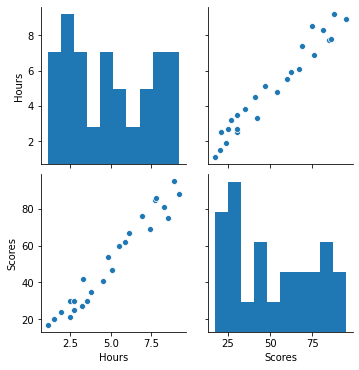

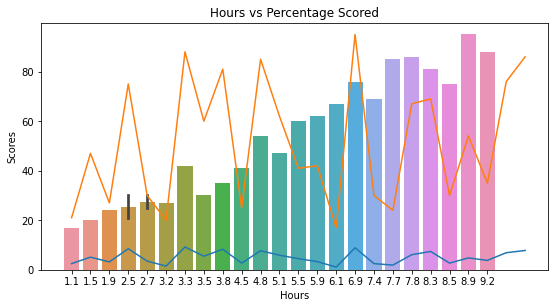

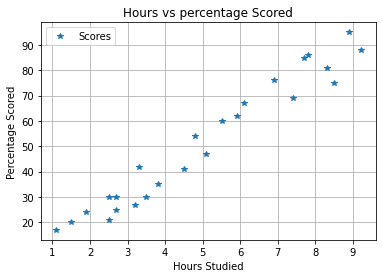

In [2]:
sns.pairplot(df) #to check whether it is a linear regression
plt.plot()

#barplot comparing hours studied vs percentage scored
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(221)
sns.barplot(x=df['Hours'], y=df['Scores'], ax=ax1)

plt.plot(df)
plt.title("Hours vs Percentage Scored")

#plotting the relationship between hours studied and percentage scored
df.plot(x = 'Hours',y = 'Scores', style='*')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs percentage Scored')
plt.grid()

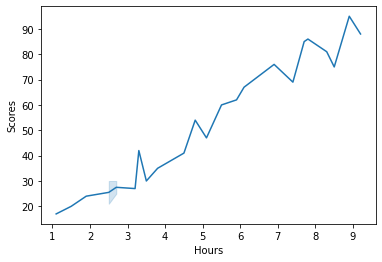

In [3]:
sns.lineplot(df['Hours'],df['Scores'])  #positive linear regression


In [4]:
#splitting the data set for further analysis
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

from sklearn.model_selection import train_test_split #to split this data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

print('Training Score: ', round(l_reg.score(X_train,y_train)*100,2),'%')
print('Testing Score: ', round(l_reg.score(X_test,y_test)*100,2),'%')


Training Score:  94.85 %
Testing Score:  93.68 %


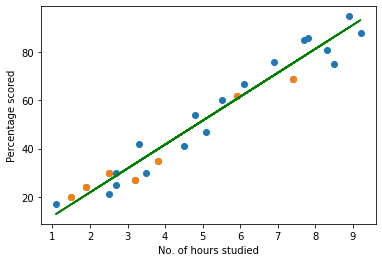

In [5]:
m = l_reg.coef_   #linear regression line slope
c = l_reg.intercept_  #linear regression line y-intercept

#Plotting the regression line on training data
predicted_line = (m*X) + c
plt.scatter(X,y)
plt.plot(X, predicted_line, c='green');
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")

predicted_line = (m*X) + c
plt.scatter(X_test,y_test)
plt.plot(X, predicted_line, c='green');
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")
plt.show()

In [6]:
y_predict=l_reg.predict(X_test)
y_predict


array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

Accuracy Score of Model:  93.68 %


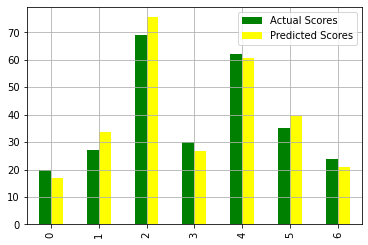

In [7]:
from sklearn import metrics
acc=metrics.r2_score(y_test,y_predict)
print("Accuracy Score of Model: ",round(acc*100,2),'%')

    

prediction_df = pd.DataFrame({ 'Actual Scores': y_test, 'Predicted Scores': y_predict})  
prediction_df

prediction_df.plot(kind='bar',color=['green','yellow'])
plt.grid()


In [8]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('Explained Variance Score:',metrics.explained_variance_score(y_test,y_predict))

hours = 8.7
test = np.array([hours])
test = test.reshape(-1, 1)
new_pred = l_reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

def score_prediction():
   
    x=float(input('Enter hours studied to predict scores: '))
    hours = x
    test = np.array([hours])
    test = test.reshape(-1, 1)
    new_pred = l_reg.predict(test)
    print('\n')
    print("No of Hours = {}".format(hours))
    print("Score Predicted = {}".format(round(new_pred[0]),2))

score_prediction()

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
Explained Variance Score: 0.9398737229250631
No of Hours = 8.7
Predicted Score = 88.42480580669806
Enter hours studied to predict scores: 88


No of Hours = 88.0
Score Predicted = 877.0
